# EAST WEST AIRLINES CLUSTERING 

**IMPORT LIBRARIES**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import zscore

In [2]:
df = pd.read_csv('EastWestAirlines.csv')

**EXPLORATORY DATA ANALYSIS**

In [4]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.shape

(3999, 12)

In [6]:
df = df.iloc[:,2:]
df

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0,1,1,1,174,1,0,0,7000,0
1,0,1,1,1,215,2,0,0,6968,0
2,0,1,1,1,4123,4,0,0,7034,0
3,0,1,1,1,500,1,0,0,6952,0
4,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...
3994,0,1,1,1,8525,4,200,1,1403,1
3995,0,1,1,1,981,5,0,0,1395,1
3996,0,3,1,1,25447,8,0,0,1402,1
3997,0,1,1,1,500,1,500,1,1401,0


In [7]:
df.isnull().sum()

Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [8]:
df.describe

<bound method NDFrame.describe of       Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  Bonus_trans  \
0              0          1          1          1          174            1   
1              0          1          1          1          215            2   
2              0          1          1          1         4123            4   
3              0          1          1          1          500            1   
4              0          4          1          1        43300           26   
...          ...        ...        ...        ...          ...          ...   
3994           0          1          1          1         8525            4   
3995           0          1          1          1          981            5   
3996           0          3          1          1        25447            8   
3997           0          1          1          1          500            1   
3998           0          1          1          1            0            0   

      Flight_mile

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Qual_miles         3999 non-null   int64
 1   cc1_miles          3999 non-null   int64
 2   cc2_miles          3999 non-null   int64
 3   cc3_miles          3999 non-null   int64
 4   Bonus_miles        3999 non-null   int64
 5   Bonus_trans        3999 non-null   int64
 6   Flight_miles_12mo  3999 non-null   int64
 7   Flight_trans_12    3999 non-null   int64
 8   Days_since_enroll  3999 non-null   int64
 9   Award              3999 non-null   int64
dtypes: int64(10)
memory usage: 312.6 KB


In [10]:
df.columns

Index(['Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles',
       'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [11]:
dfScaled = df.apply(zscore)
dfScaled

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...
3994,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


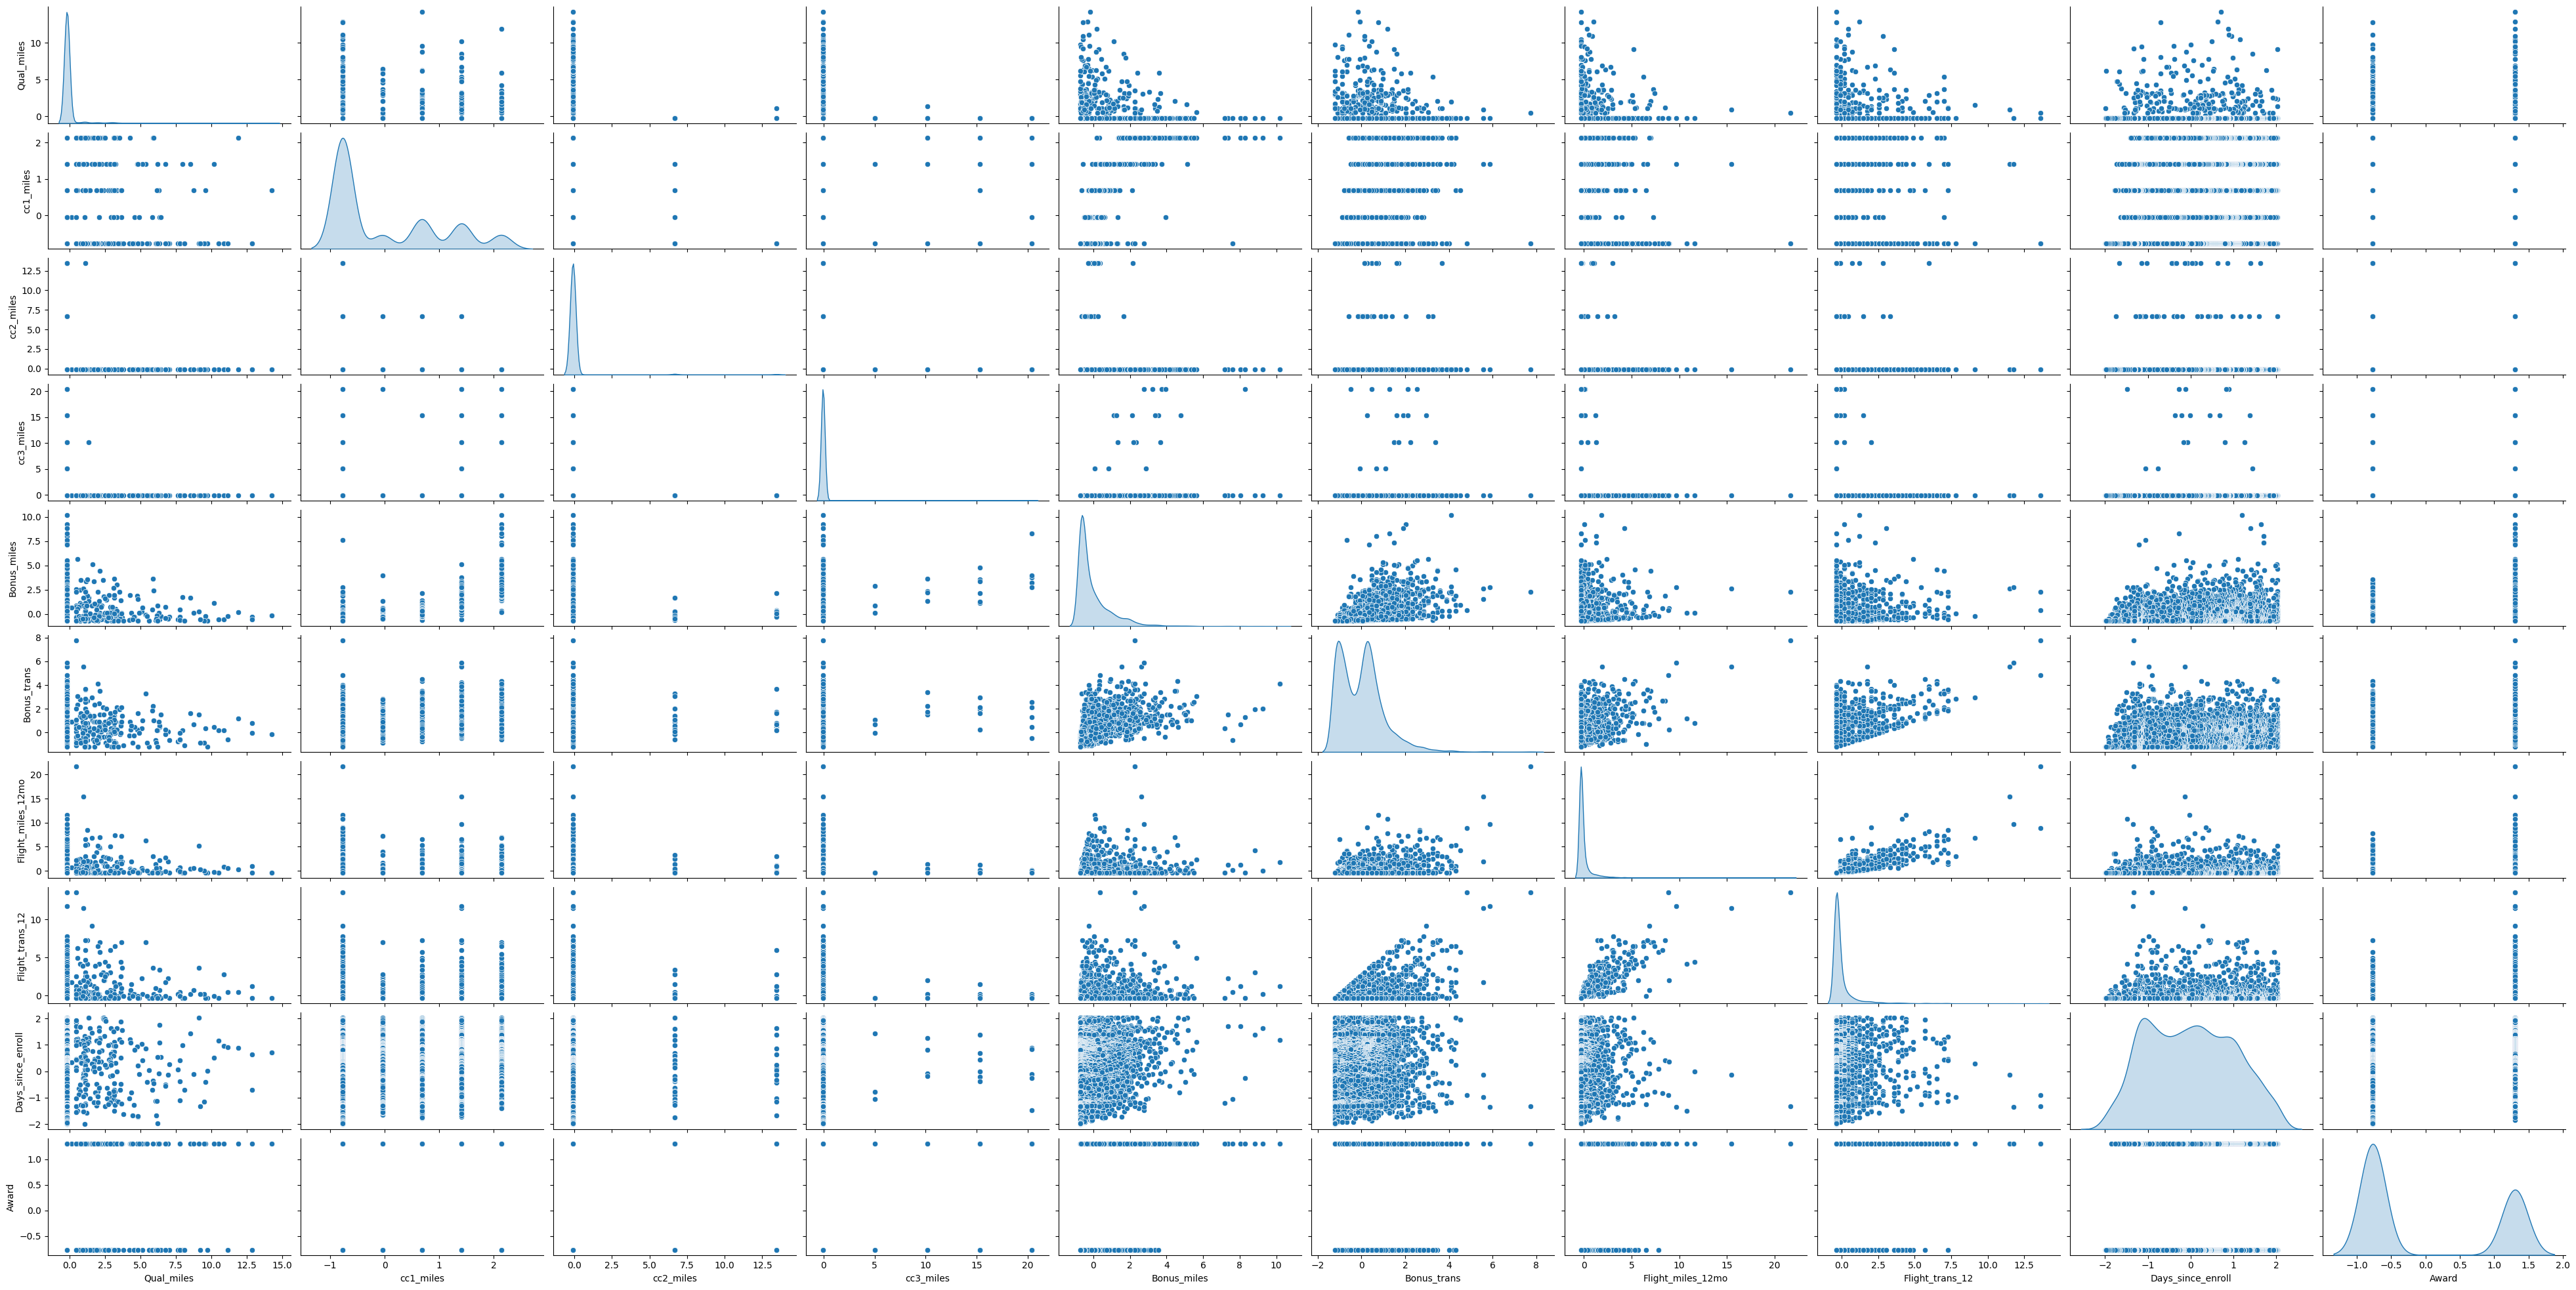

In [12]:
sns.pairplot(dfScaled,height=2,aspect=2,diag_kind='kde')

**MODEL BUILDING**

In [14]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='average')

In [15]:
model.fit(dfScaled)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=3)

In [16]:
df['labels'] = model.labels_ ## clustered attribute 
df.head(10)

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,labels
0,0,1,1,1,174,1,0,0,7000,0,1
1,0,1,1,1,215,2,0,0,6968,0,1
2,0,1,1,1,4123,4,0,0,7034,0,1
3,0,1,1,1,500,1,0,0,6952,0,1
4,0,4,1,1,43300,26,2077,4,6935,1,1
5,0,1,1,1,0,0,0,0,6942,0,1
6,0,3,1,1,27482,25,0,0,6994,0,1
7,0,1,1,1,5250,4,250,1,6938,1,1
8,0,3,2,1,1753,43,3850,12,6948,1,1
9,0,3,1,1,28426,28,1150,3,6931,1,1


In [17]:
df[df['labels']==0]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,labels
2015,888,4,1,1,80696,65,22100,45,3831,1,0
3235,0,1,1,1,26161,58,12873,53,2272,1,0
3583,500,1,1,1,71954,86,30817,53,1373,1,0
3594,0,4,1,1,83726,68,14050,46,1325,1,0


In [18]:
df[df['labels']==1]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,labels
0,0,1,1,1,174,1,0,0,7000,0,1
1,0,1,1,1,215,2,0,0,6968,0,1
2,0,1,1,1,4123,4,0,0,7034,0,1
3,0,1,1,1,500,1,0,0,6952,0,1
4,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,0,1,1,1,8525,4,200,1,1403,1,1
3995,0,1,1,1,981,5,0,0,1395,1,1
3996,0,3,1,1,25447,8,0,0,1402,1,1
3997,0,1,1,1,500,1,500,1,1401,0,1


In [19]:
df[df['labels']==2]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,labels
106,1182,1,1,3,49059,26,2300,9,6738,1,2
384,0,5,1,4,103456,32,0,0,6980,1,2
850,0,4,1,5,107308,36,600,2,5966,1,2
904,0,2,1,5,112171,16,0,0,5825,1,2
1036,0,4,1,3,73881,33,0,0,5769,0,2
1244,0,4,1,4,98717,30,0,0,5531,0,2
1300,0,3,1,4,43993,40,2150,7,5030,0,2
1878,0,5,1,4,132263,32,400,2,4103,1,2
1917,0,5,1,3,105325,44,1000,2,3964,1,2
1946,0,4,1,5,95598,32,500,1,3880,1,2


In [20]:
df['labels'].value_counts()

labels
1    3980
2      15
0       4
Name: count, dtype: int64

In [21]:
df_Clust=df.groupby(['labels'])

In [22]:
df_Clust

In [23]:
df_Clust.mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
labels,,,,,,,,,,
0,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
1,144.156784,2.053769,1.014573,1.000754,16806.729899,11.481910,440.282161,1.324623,4118.620603,0.369095
2,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [24]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist

In [25]:
z = linkage(dfScaled,metric='euclidean',method='average')

In [26]:
c,coph_dist = cophenet(z,pdist(dfScaled))

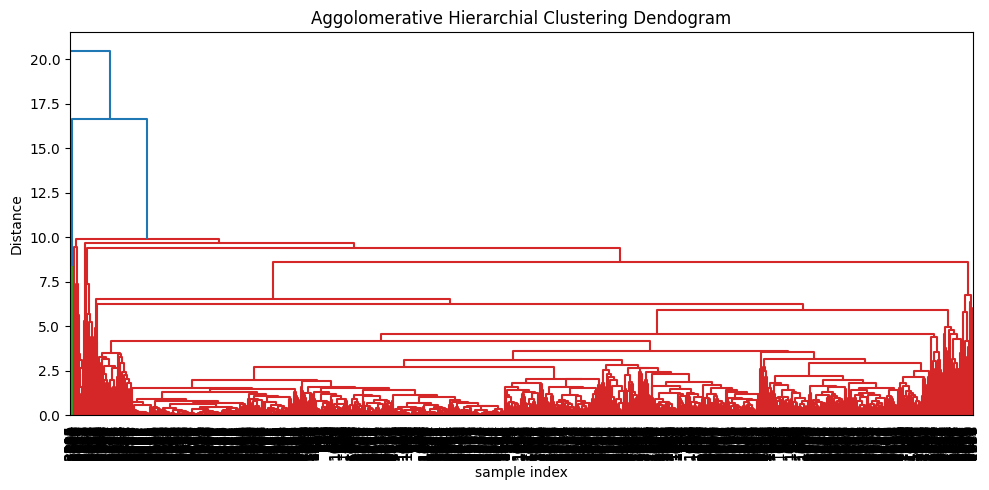

In [27]:
plt.figure(figsize=(10,5))
plt.title("Aggolomerative Hierarchial Clustering Dendogram")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(z,leaf_rotation= 90,leaf_font_size=10)
plt.tight_layout()

In [28]:
z = linkage(dfScaled,metric='euclidean',method='complete')
z

array([[9.60000000e+02, 9.61000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.18900000e+03, 1.33400000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.30900000e+03, 1.37100000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [7.98300000e+03, 7.99300000e+03, 2.06201644e+01, 3.98000000e+03],
       [7.98900000e+03, 7.99400000e+03, 2.70951488e+01, 3.99500000e+03],
       [7.99000000e+03, 7.99500000e+03, 3.44585330e+01, 3.99900000e+03]])

In [38]:
c,coph_dist = cophenet(z,pdist(dfScaled))
c

0.8745711558250165